In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the encoder function
def encoder(input_size, hidden_size):
    return nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU()
    )

# Define the decoder function
def decoder(hidden_size, output_size):
    return nn.Sequential(
        nn.Linear(hidden_size, output_size),
        nn.Sigmoid()  # Sigmoid for output values between 0 and 1
    )

# Define the loss function
def loss_function(reconstructed, original):
    criterion = nn.MSELoss()
    return criterion(reconstructed, original)

# Define the optimizer
def get_optimizer(params, lr):
    return optim.Adam(params, lr=lr)

# Define the training function
def train_autoencoder(encoder, decoder, train_loader, num_epochs=10, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    decoder.to(device)

    # Define the optimizer
    params = list(encoder.parameters()) + list(decoder.parameters())
    optimizer = get_optimizer(params, learning_rate)

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1).to(device)  # Flatten the input images

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            encoded = encoder(inputs)
            outputs = decoder(encoded)

            # Compute the loss
            loss = loss_function(outputs, inputs)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")


# Example usage:
if __name__ == "__main__":
    # Define dataset and dataloader
    transform = transforms.Compose([transforms.ToTensor()])
    train_set = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

    # Define autoencoder parameters
    input_size = 28 * 28  # MNIST image size
    hidden_size = 64  # Size of the latent space
    output_size = input_size  # Output size same as input size

    # Create encoder and decoder
    encoder_net = encoder(input_size, hidden_size)
    decoder_net = decoder(hidden_size, output_size)

    # Train the autoencoder
    train_autoencoder(encoder_net, decoder_net, train_loader, num_epochs=10, learning_rate=0.001)


Epoch 1/10, Loss: 0.034645561492249274
Epoch 2/10, Loss: 0.011215455307345242
Epoch 3/10, Loss: 0.007263057222311843
Epoch 4/10, Loss: 0.005935247053703996
Epoch 5/10, Loss: 0.005361257855202566
Epoch 6/10, Loss: 0.0050915138798950516
Epoch 7/10, Loss: 0.004937511373327167
Epoch 8/10, Loss: 0.004842769581455189
Epoch 9/10, Loss: 0.004773135901416844
Epoch 10/10, Loss: 0.004715852510890981


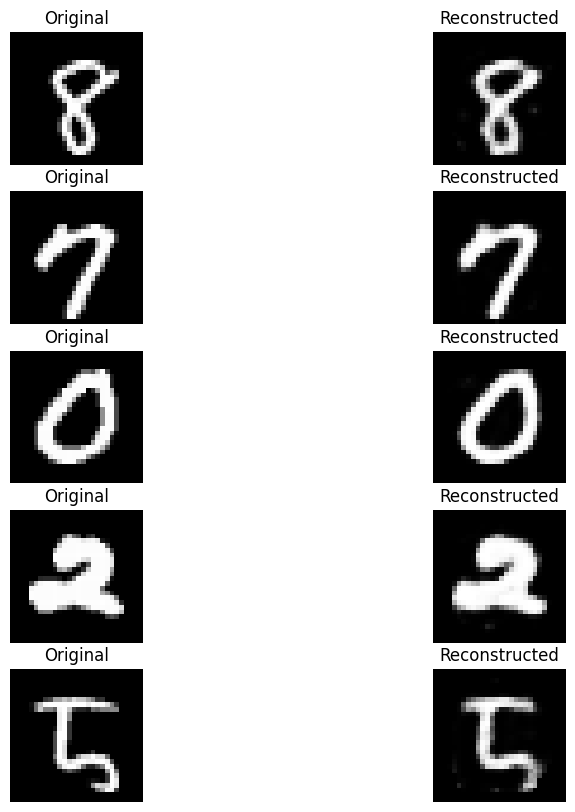

In [5]:
import matplotlib.pyplot as plt

# Function to test the autoencoder and plot the reconstructed images
def test_autoencoder(encoder, decoder, test_loader, num_images=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Get some test images
    images, labels = next(iter(test_loader))
    images = images[:num_images].to(device)
    labels = labels[:num_images]

    # Pass the images through encoder and decoder
    with torch.no_grad():
        encoded = encoder(images.view(-1, 28 * 28))
        reconstructed = decoder(encoded)

    # Plot original and reconstructed images
    fig, axes = plt.subplots(num_images, 2, figsize=(10, 2 * num_images))
    for i in range(num_images):
        axes[i, 0].imshow(images[i].cpu().numpy().reshape(28, 28), cmap='gray')
        axes[i, 0].set_title('Original')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(reconstructed[i].cpu().numpy().reshape(28, 28), cmap='gray')
        axes[i, 1].set_title('Reconstructed')
        axes[i, 1].axis('off')
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Define dataset and dataloader for testing
    test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=5, shuffle=True)

    # Test the autoencoder
    test_autoencoder(encoder_net, decoder_net, test_loader, num_images=5)
